In [2]:
# import packages
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from matplotlib import pyplot as plt

# read input data
df = pd.read_pickle("accidents.pkl.gz")

### Hypotéza 1
*Na silnicích první třídy se při nehodách umíralo se stejnou pravděpodobností jako dálnicích.*

K ověření hypotézy využijte $\chi^2$ test s tím, že také určíte, jestli nehody na silnicích 1. třídy vedly častěji či méně často k fatální nehodě. V tom vám může pomoct “expected” výstup $\chi^2$ testu. Nerozlišujte počet následků, ale pouze nehody, kde došlo k jednomu a více úmrtí (p13a > 0).

In [3]:
# In this task, we compare accidents from first class roads and highways, so ignore the rest
# and also ignore invalid values of fatalities
df_h1 = df[ (df["p36"] == 1) | (df["p36"] == 0) | (df["p13a"] == -1)].copy()

df_h1["fatal"] = False
df_h1.loc[df_h1["p13a"] > 0, "fatal"] = True

df_h1["highway"] = False
df_h1.loc[df_h1["p36"] == 0, "highway"] = True

ctab = pd.crosstab(
    index=df_h1["fatal"],
    columns=df_h1["highway"],
)
stat, p_value, dof, expected = chi2_contingency(ctab)

if p_value < 0.05:
    print('Na hladině významnosti 0.05 zamítáme hypotézu:')
else:
    print('Na hladině významnosti 0.05 přijimáme hypotézu:')
print('\t"Na silnicích první třídy se při nehodách umíralo se stejnou pravděpodobností jako dálnicích."')

print("\nctab - expected = ")
print(ctab - expected)

Na hladině významnosti 0.05 zamítáme hypotézu:
	"Na silnicích první třídy se při nehodách umíralo se stejnou pravděpodobností jako dálnicích."

ctab - expected = 
highway      False       True
fatal                        
False   -87.320989  87.320989
True     87.320989 -87.320989


Kromě toho, že hypotéza byla zamítnuta, je z výstupu předchozí buňky (konkrétně z výsledku $ctab - expected$) zřejmé:
Počet smrtelných nehod na silnicích 1. třídy je o 87 vyšší, než se předpokládalo. Zatímco počet smrtelných nehod na dálnicích je o 87 nižší, než se předpokládalo.
Z toho můžeme odvodit, že nehody na silnicích 1. třídy vedly častěji k fatální nehodě, než nehody na dálnicích.

Závěr tedy je, že při porovnání nehod na silnicích první třídy a na dálnicích, lze nalézt statisticky významý rozdíl, který nasvědčuje, že nehody na silnicích první třídy častěji vedou k fatálním nehodám, než nehody na dálnicích.

### Hypotéza 2
*Při nehodách vozidel značky Škoda je škoda na vozidle nižší než při nehodách vozidel Audi.*

Využijte vhodný test a určete, zda je škoda na vozidlech vyšší či nižší a zda je tato vlastnost
na požadované hladině významnosti.

In [4]:
# ignore invalid values
df_h2 = df[df["p53"] != -1].copy()

# obtain monetary damage from škoda and audi accidents
audi = df_h2.loc[df_h2["p45a"] == 2, "p53"]
skoda = df_h2.loc[df_h2["p45a"] == 39, "p53"]

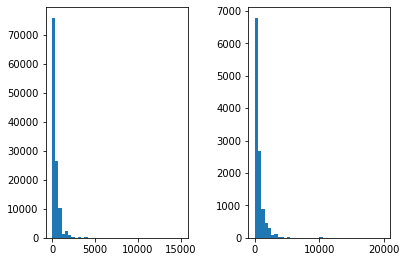

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(skoda, label=audi, bins=40)
ax2.hist(audi, label=audi, bins=40)
fig.tight_layout(pad=2)
plt.show()

Z výstupu předchozí buňky můžeme vidět, že data nemají normální rozložení. Tuto informaci musíme zohlednit při výběru statistického testu. Navíc máme dvě hodnoty ze dvou "populací" (od dvou různých značek aut), použijeme tedy Mann-Whitney U-Test, který je neparametrický a přesně odpovídá naším požadavkům.

In [6]:
stat, p_value = mannwhitneyu(audi, skoda, alternative="less")
if p_value < 0.05:
    print('Na hladině významnosti 0.05 zamítáme hypotézu:')
else:
    print('Na hladině významnosti 0.05 přijimáme hypotézu:')
print('\t"Při nehodách vozidel značky Škoda je škoda na vozidle nižší, než při nehodách vozidel Audi."')

Na hladině významnosti 0.05 přijimáme hypotézu:
	"Při nehodách vozidel značky Škoda je škoda na vozidle nižší, než při nehodách vozidel Audi."


Hypotézu přijimáme na dané hladině významnosti a závěrem tedy je, že mezi škodami při nehodách aut značky Audi a značky Škoda je statisticky významný rozdíl a škody na autech značky Audi, jsou vyšší, než škody na autech značky Škoda.
